## _Sprint - 4: Train the model on IBM_

### _Team-ID: PNT2022TMID21878_

#### Current Directory

In [2]:
pwd

'/home/wsuser/work'

#### Installing keras and tensorflow

In [3]:
!pip install keras==2.2.4
!pip install tensorflow

     |████████████████████████████████| 312 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 8.3 MB/s  eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 1.3 MB 16.9 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


### Understading the Data

#### Importing Libraries

In [4]:
import numpy as np
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

#### Load Data

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Analysing the Data

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

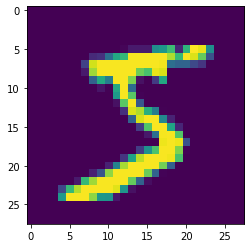

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

#### Reshaping the data

In [10]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

#### One Hot Encoding

In [11]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Model Building

#### Adding CNN 

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, (3,3),input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))

In [16]:
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

#### Compiling the Model

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

#### Train the model

In [20]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 120)

Epoch 1/5
500/500 [==============================] - 57s 114ms/step - loss: 0.4429 - accuracy: 0.9040 - val_loss: 0.0914 - val_accuracy: 0.9709
Epoch 2/5
500/500 [==============================] - 56s 112ms/step - loss: 0.0842 - accuracy: 0.9744 - val_loss: 0.0735 - val_accuracy: 0.9785
Epoch 3/5
500/500 [==============================] - 56s 113ms/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.0529 - val_accuracy: 0.9828
Epoch 4/5
500/500 [==============================] - 57s 113ms/step - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0571 - val_accuracy: 0.9831
Epoch 5/5
500/500 [==============================] - 57s 113ms/step - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.0634 - val_accuracy: 0.9810


#### Testing the Model

In [21]:
prediction = model.predict(x_test[:4])
prediction

array([[1.5022606e-11, 5.2836137e-18, 9.7208919e-10, 7.7790052e-10,
        1.1931080e-18, 1.2543266e-11, 1.0359681e-21, 1.0000000e+00,
        4.3217974e-10, 1.7879126e-08],
       [6.4027783e-10, 2.1341892e-08, 9.9999988e-01, 5.5587837e-08,
        3.0708953e-11, 1.5403982e-15, 2.9243312e-09, 3.1099540e-10,
        2.4217262e-09, 3.6109618e-10],
       [3.4136136e-04, 9.9538606e-01, 4.2347517e-04, 8.9462694e-05,
        1.6946543e-04, 1.9520835e-04, 5.7007320e-04, 6.5221754e-04,
        9.5622276e-04, 1.2163990e-03],
       [9.9998093e-01, 1.8205783e-10, 5.1030980e-07, 1.0059243e-08,
        1.3490948e-09, 4.4286894e-06, 5.6332210e-06, 3.8600075e-07,
        4.2404400e-07, 7.6377628e-06]], dtype=float32)

In [22]:
np.argmax(prediction, axis=1)

array([7, 2, 1, 0])

#### Observing the metrics

In [23]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print('METRICS\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(metrics[0],metrics[1]))

METRICS
 Loss: 0.063
 Accuracy: 0.981


#### Saving the model

In [24]:
model.save('IBM_mnistCNN.h5')

In [25]:
!tar -zcvf handwritten-mnist-model.tgz IBM_mnistCNN.h5

IBM_mnistCNN.h5


In [26]:
ls -1

handwritten-mnist-model.tgz
IBM_mnistCNN.h5


In [27]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 18.5 MB/s eta 0:00:01


In [28]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"6ZZeLAcwqabhTq0FkglndKm5ffkq7093nzkqcrluxFBN"
}

client = APIClient(wml_credentials)

In [29]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [30]:
space_uid = guid_from_space_name(client, "handwritten")
space_uid

'27f83f58-2d38-4ac4-a2a3-325ed6a86fb2'

In [31]:
client.set.default_space(space_uid)

'SUCCESS'

In [32]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [33]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid 

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [37]:
model_details = client.repository.store_model(model ='handwritten-mnist-model.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details)
model_id

'4829c3d6-8399-490f-9a33-1354e47e4b11'

In [38]:
client.repository.download(model_id, "model.tar.gz")

Successfully saved model content to file: 'model.tar.gz'


'/home/wsuser/work/model.tar.gz'

In [39]:
ls

handwritten-mnist-model.tgz  IBM_mnistCNN.h5  model.tar.gz


#### Testing the model


In [40]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [43]:
model = load_model("IBM_mnistCNN.h5")

In [47]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

In [48]:
img = Image.open(streaming_body_1).convert("L")
img = img.resize( (28,28) )
img

In [49]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [50]:
pred = model.predict(im2arr)
print(pred)

[[9.9999833e-01 1.7017735e-09 8.6330488e-08 1.3217472e-10 5.7381423e-11
  4.1515684e-09 5.1536031e-08 3.5855579e-09 6.5064945e-08 1.4557673e-06]]


In [51]:
print(np.argmax(pred, axis=1))

[0]
